<a href="https://colab.research.google.com/github/soul-python/Rakshanda-TSF-GRIP-IoTandComputerVision/blob/main/GRIP_Task_Traffic_sign_classification_Recognition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "kaggle_username" # username from the json file
os.environ['KAGGLE_KEY'] = "kaggle_key" # key from the json file
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 96% 590M/612M [00:04<00:00, 91.6MB/s]
100% 612M/612M [00:04<00:00, 138MB/s] 


In [ ]:
!unzip /content/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

In [ ]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes):
  path = "/content/train/{}".format(i)
  print(path)
  Class=os.listdir(path)
  for a in Class:
    try:
      image=cv2.imread(path+'/'+a)
      image_from_array = Image.fromarray(image, 'RGB')
      size_image = image_from_array.resize((height, width))
      data.append(np.array(size_image))
      labels.append(i)
    except AttributeError:
      print(" ")
           
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

/content/train/0
/content/train/1
/content/train/2
/content/train/3
/content/train/4
/content/train/5
/content/train/6
/content/train/7
/content/train/8
/content/train/9
/content/train/10
/content/train/11
/content/train/12
/content/train/13
/content/train/14
/content/train/15
/content/train/16
/content/train/17
/content/train/18
/content/train/19
/content/train/20
/content/train/21
/content/train/22
/content/train/23
/content/train/24
/content/train/25
/content/train/26
/content/train/27
/content/train/28
/content/train/29
/content/train/30
/content/train/31
/content/train/32
/content/train/33
/content/train/34
/content/train/35
/content/train/36
/content/train/37
/content/train/38
/content/train/39
/content/train/40
/content/train/41
/content/train/42


In [ ]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


In [ ]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))


Epoch 1/20
981/981 [==============================] - 4s 5ms/step - loss: 1.2385 - accuracy: 0.6457 - val_loss: 0.1709 - val_accuracy: 0.9594
Epoch 2/20
981/981 [==============================] - 4s 4ms/step - loss: 0.2545 - accuracy: 0.9219 - val_loss: 0.0702 - val_accuracy: 0.9846
Epoch 3/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1492 - accuracy: 0.9543 - val_loss: 0.0449 - val_accuracy: 0.9893
Epoch 4/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1059 - accuracy: 0.9679 - val_loss: 0.0323 - val_accuracy: 0.9918
Epoch 5/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0858 - accuracy: 0.9732 - val_loss: 0.0282 - val_accuracy: 0.9931
Epoch 6/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0761 - accuracy: 0.9766 - val_loss: 0.0196 - val_accuracy: 0.9950
Epoch 7/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0672 - accuracy: 0.9789 - val_loss: 0.0258 - val_accuracy: 0.9939
Epoch 

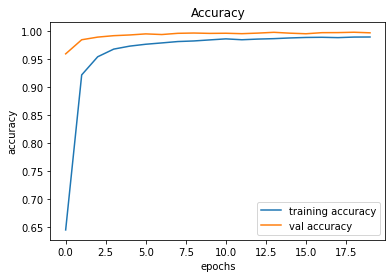

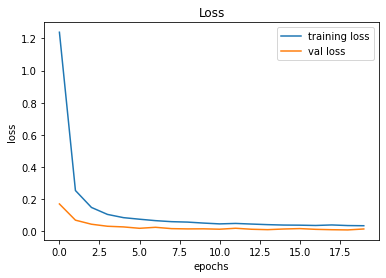

In [ ]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
#Predicting with the test data
y_test=pd.read_csv("/content/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('/content/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9749802058590658